<a href="https://colab.research.google.com/github/SloBluck/MeadThread-other/blob/main/1Procesamiento_LaboratorioPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos,sin,pi,log

In [3]:
def binary(lon,num):
    i,binario=0,0
    while num>=1:
        binario+=(num%2)*(10**i)
        i+=1
        num//=2
    return str(binario).zfill(lon)
def decimal(num):
    dec,i=0,0
    while (num>=1):
        d=num%10
        num=num//10
        dec+=d*pow(2,i)
        i=i+1
    return dec
def impulso(t):
  return (t==0)*1
def u(t):
  return (t>=0)*1

# Cuantizador Mead Thread

In [ ]:
Vmax=1
Vmin=-1
M=3 #Número de bits
L=int(2**M)
intq=(Vmax-Vmin)/L
valM,valQ,valC=[0.73,0.61,0.34,-0.31,0.376,-0.373],[],[]
x,y=[],[]
for i in range(-int(L/2),1+int(L/2)):
    x.append(intq*(i-1/2))
    y.append(i*intq)
for i in range(len(valM)):
    for j in range(1,len(x)):
        if x[j-1]<valM[i]<=x[j]:
            valQ.append(y[j-1])
            valC.append(binary(M,int(j+(y[j-1]<0)*(L/2-1)-(y[j-1]>=0)*((L+1)/2))))

Q = [0.75, 0.5, 0.25, -0.25, 0.5, -0.25]
C = ['011', '010', '001', '111', '010', '111']


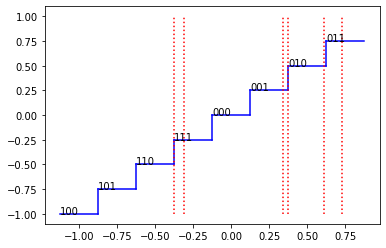

In [ ]:
for i in range(1,L+1):
    plt.plot([x[i-1],x[i]],[y[i-1],y[i-1]],color="blue")
    plt.annotate(binary(M,int(i+(y[i-1]<0)*(L/2-1)-(y[i-1]>=0)*((L+1)/2))),(x[i-1],y[i-1]))
    if i!=L:
        plt.plot([x[i],x[i]],[y[i-1],y[i]],color="blue")

for i in range(len(valM)):
   plt.plot([valM[i],valM[i]],[min(y),max(y)],linestyle='dotted',color="red")
print("Q =",valQ)
print("C =",valC)

# Graficando la señal

In [ ]:
Trama=valC

<ipython-input-6-9ce020b47070>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(xtrama,mx)


<StemContainer object of 3 artists>

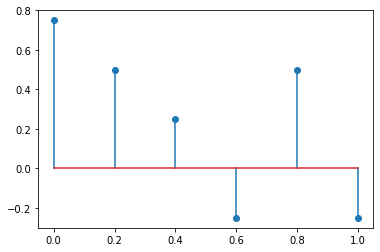

In [ ]:
isbinary=True
xtrama=np.linspace(0,1,len(Trama))
mx=[]
for i in Trama:
  i=int(i)
  if isbinary:
    i=decimal(i)
  mx.append(intq*i) if i<L/2 else mx.append(-(L-i)*intq)
plt.stem(xtrama,mx)

# Filtraje espacial

# Examen PDS



In [ ]:
fm=3*10e+2
fs_mín=2*fm
print(fs_mín,"Hz")

6000.0 Hz


In [ ]:
def x(t):
  return 0.2*np.cos(2*pi*t)+0.1*np.sin(2*pi*5*t)
t=np.arange(0,2+intq,intq)

In [ ]:
x(t),t

(array([ 0.2,  0.1, -0.2, -0.1,  0.2,  0.1, -0.2, -0.1,  0.2]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]))

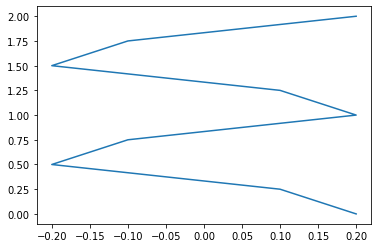

In [ ]:
plt.plot(x(t),t)

# Recuantización

In [ ]:
x=[0.312,0.183,-0.423,0.018,0.116,0.532,0.391,-0.231]

In [ ]:
fe=max(list(map(abs,x)))
r=8  #r
r1=3 #r'
rfe=6 #rfe

In [ ]:
y_prima,y=[],[]
for i in x:
  i=float(i)
  y_prima.append(round(i*(pow(2,r1-1)-1)/fe))
for i in y_prima:
  y.append(round((fe*i)/(pow(2,r1-1)-1),3))

In [ ]:
fcomp=r*len(x)/(rfe+r1*len(x))
if fcomp>1:
  print("Sí hubo reducción (compresión) de información.")
else:
  print("No hubo reducción (compresión) de información.")
print("Factor de compresión:",round(fcomp,3))

Sí hubo reducción (compresión) de información.
Factor de compresión: 2.133


In [ ]:
Ex,Eeq=0,0
for i in range(len(x)):
  Ex+=pow(x[i],2)
  Eeq+=pow(x[i]-y[i],2)
SNR=10*log(Ex/Eeq,10)
print(round(SNR,3),"dB")

17.407 dB


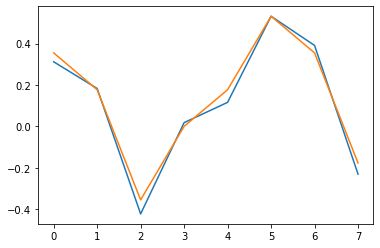

In [ ]:
plt.plot(np.arange(0,len(x)),x)
plt.plot(np.arange(0,len(x)),y)

## Descripción de sistema discreto

In [1]:
def y(n):
  a,b,c=2,-0.5,0
  return c*a*impulso(n-1)+c*b*impulso(n-2)

In [6]:
n=np.round(np.arange(0,5,0.01),2)

In [4]:
y(1)

0.0

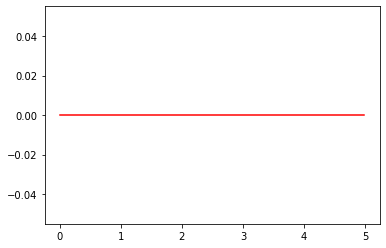

In [7]:
plt.plot(n,y(n),color='red')